# Final Project 4

In this project the final model creation will be done with comparisons of performance and analyzing the outcome of it 

### Step 1: Loading the python libraries needed for this project 

In [19]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data set 

In [20]:
#Read in data from source 
df_raw = pd.read_csv("./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv("./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print df_raw.head()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        C

In [21]:
for col in ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']:
     df_raw[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [22]:
for col in ['MultipleLines']:
     df_raw[col].replace({'Yes': 1, 'No': 0, 'No phone service': 2}, inplace=True)

In [23]:
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
     df_raw[col].replace({'Yes': 1, 'No': 0, 'No internet service': 2}, inplace=True)

In [24]:
df_raw['gender']=df_raw['gender'].replace({'Male': 0, 'Female': 1})
df_raw['InternetService']=df_raw['InternetService'].replace({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df_raw['Contract']=df_raw['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_raw['PaymentMethod']=df_raw['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})

From the dataset and from the previous analisys it could be studied the correlation between variables and which features are important to analyze in this matter. 

The correlation study will be included below:

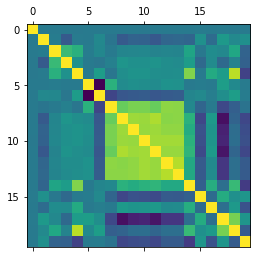

In [25]:
plt.matshow(df_raw.corr())

Coming from the results of the matrix of correlation is where we can start drawing conclusions about which variables we dont need to account in order to avoid multicollinearity. 

In [26]:
df['gender']=df['gender'].replace({'Male': 0, 'Female': 1})

for col in ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']:
     df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Droppping the columns that are not going to be used to avoid multicollinearity, the binary features were transformed in a previous step

In [28]:
df=df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','InternetService','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','Churn']]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,0
2,0,0,0,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,1


Now the dummy variables will be created from the features 'InternetService','Contract' and 'PaymentMethod'

In [29]:
dummy_IntServ = pd.get_dummies(df['InternetService'], prefix='IntServ')
print(dummy_IntServ.head())

   IntServ_DSL  IntServ_Fiber optic  IntServ_No
0            1                    0           0
1            1                    0           0
2            1                    0           0
3            1                    0           0
4            0                    1           0


In [30]:
dummy_Contract = pd.get_dummies(df['Contract'], prefix='Contract')
print(dummy_Contract.head())

   Contract_Month-to-month  Contract_One year  Contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
3                        0                  1                  0
4                        1                  0                  0


In [31]:
dummy_PayMethod = pd.get_dummies(df['PaymentMethod'], prefix='PayMethod')
print(dummy_PayMethod.head())

   PayMethod_Bank transfer (automatic)  PayMethod_Credit card (automatic)  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    1                                  0   
4                                    0                                  0   

   PayMethod_Electronic check  PayMethod_Mailed check  
0                           1                       0  
1                           0                       1  
2                           0                       1  
3                           0                       0  
4                           1                       0  


In [32]:
dummy_Contract = pd.get_dummies(df['Contract'], prefix='Contract')
print(dummy_Contract.head())

   Contract_Month-to-month  Contract_One year  Contract_Two year
0                        1                  0                  0
1                        0                  1                  0
2                        1                  0                  0
3                        0                  1                  0
4                        1                  0                  0


In [33]:
cols_to_keep = ['Churn','gender', 'SeniorCitizen', 'Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges']
data = df[cols_to_keep].join(dummy_IntServ.loc[:, 'IntServ_Fiber Optic':])
data = data.join(dummy_Contract.loc[:, 'Contract_One year':])
data = data.join(dummy_PayMethod.loc[:, 'PayMethod_Credit card (automatic)':])
print(data.head())

   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0       1              0        1           0       1             0   
1      0       0              0        0           0      34             1   
2      1       0              0        0           0       2             1   
3      0       0              0        0           0      45             0   
4      1       1              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  IntServ_Fiber optic  IntServ_No  \
0                 1           29.85                    0           0   
1                 0           56.95                    0           0   
2                 1           53.85                    0           0   
3                 0           42.30                    0           0   
4                 1           70.70                    1           0   

   Contract_One year  Contract_Two year  PayMethod_Credit card (automatic)  \
0                  0

We're going to add a constant term for our Logistic Regression
- The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly

In [34]:
# manually add the intercept
data['intercept'] = 1.0

#### Define the labels of the covariates (columns) as a variable called 'train_cols'

In [35]:
data.columns

Index([u'Churn', u'gender', u'SeniorCitizen', u'Partner', u'Dependents',
       u'tenure', u'PhoneService', u'PaperlessBilling', u'MonthlyCharges',
       u'IntServ_Fiber optic', u'IntServ_No', u'Contract_One year',
       u'Contract_Two year', u'PayMethod_Credit card (automatic)',
       u'PayMethod_Electronic check', u'PayMethod_Mailed check', u'intercept'],
      dtype='object')

In [36]:
train_cols = data.columns[1:]

In [37]:
train_cols
##Index([u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure',
 #      u'PhoneService', u'PaperlessBilling', u'MonthlyCharges',
 #      u'IntServ_Fiber optic', u'IntServ_No', u'Contract_One year',
 #      u'Contract_Two year', u'PayMethod_Credit card (automatic)',
 #      u'PayMethod_Electronic check', u'PayMethod_Mailed check', u'intercept'],
 #     dtype='object')

Index([u'gender', u'SeniorCitizen', u'Partner', u'Dependents', u'tenure',
       u'PhoneService', u'PaperlessBilling', u'MonthlyCharges',
       u'IntServ_Fiber optic', u'IntServ_No', u'Contract_One year',
       u'Contract_Two year', u'PayMethod_Credit card (automatic)',
       u'PayMethod_Electronic check', u'PayMethod_Mailed check', u'intercept'],
      dtype='object')

#### Fit the model

In [38]:
logit = sm.Logit(data['Churn'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421506
         Iterations 8


#### Print the summary results

In [39]:
print(result.summary2())

                                  Results: Logit
Model:                    Logit                  No. Iterations:         8.0000   
Dependent Variable:       Churn                  Pseudo R-squared:       0.272    
Date:                     2018-05-14 21:33       AIC:                    5960.0664
No. Observations:         7032                   BIC:                    6069.7981
Df Model:                 15                     Log-Likelihood:         -2964.0  
Df Residuals:             7016                   LL-Null:                -4071.7  
Converged:                1.0000                 Scale:                  1.0000   
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
gender                             0.0107   0.0643   0.1668 0.8675 -0.1153  0.1368
SeniorCitizen                      0.2

#### Calculate the odds ratio of the coefficients and their 95% [confidence intervals]

In [40]:
params = result.params # get coefficients
print(np.exp(params)) # odds ratio of the coefficients

gender                               1.010783
SeniorCitizen                        1.313037
Partner                              1.005356
Dependents                           0.831324
tenure                               0.965406
PhoneService                         0.478569
PaperlessBilling                     1.465409
MonthlyCharges                       1.012581
IntServ_Fiber optic                  2.198756
IntServ_No                           0.801348
Contract_One year                    0.473346
Contract_Two year                    0.219771
PayMethod_Credit card (automatic)    0.909830
PayMethod_Electronic check           1.455600
PayMethod_Mailed check               0.964904
intercept                            0.478432
dtype: float64


In [41]:
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf)) # confidence intervals (we get the odds ratio from the log odds by exponentiating the coefficient)

                                       2.5%     97.5%        OR
gender                             0.891092  1.146551  1.010783
SeniorCitizen                      1.114196  1.547364  1.313037
Partner                            0.864604  1.169021  1.005356
Dependents                         0.698463  0.989456  0.831324
tenure                             0.961116  0.969714  0.965406
PhoneService                       0.362051  0.632586  0.478569
PaperlessBilling                   1.269043  1.692160  1.465409
MonthlyCharges                     1.005605  1.019605  1.012581
IntServ_Fiber optic                1.699715  2.844317  2.198756
IntServ_No                         0.562072  1.142486  0.801348
Contract_One year                  0.385208  0.581650  0.473346
Contract_Two year                  0.156738  0.308153  0.219771
PayMethod_Credit card (automatic)  0.729031  1.135467  0.909830
PayMethod_Electronic check         1.212031  1.748117  1.455600
PayMethod_Mailed check             0.773

The result of the transformation can be found here: 

In [42]:
from sklearn import cross_validation

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system 
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

In [46]:
model = DecisionTreeClassifier()

X = data[train_cols]
y = data['Churn']
    
# Fit the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,
                   filled=True, rounded=True)

    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

In [47]:
# use cross_val_score()

# ... #

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.64745096 0.6623005  0.640782   0.64172418 0.6636233 ], Average AUC 0.651176190634


### Adjusting Decision Trees to Avoid Overfitting

In [48]:
model = DecisionTreeClassifier(
                max_depth = 4,
                min_samples_leaf = 3)

model.fit(X, y)
build_tree_image(model)

scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [0.83385058 0.83271687 0.80484131 0.81329281 0.8222224 ], Average AUC 0.821384791816


### Random Forest Models

In [49]:
model = RandomForestClassifier(n_estimators = 10)

model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
7,MonthlyCharges,0.341220
4,tenure,0.305314
8,IntServ_Fiber optic,0.056226
13,PayMethod_Electronic check,0.042769
11,Contract_Two year,0.038260
6,PaperlessBilling,0.030751
0,gender,0.030278
10,Contract_One year,0.030179
2,Partner,0.025704
1,SeniorCitizen,0.024503


In [51]:
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.78535381 0.78380976 0.77640198], Average AUC 0.781855180816
n trees: 1, CV AUC [0.66595161 0.66516723 0.63972335], Average AUC 0.656947399216
n trees: 11, CV AUC [0.79729533 0.79601337 0.79158828], Average AUC 0.794965660402
n trees: 21, CV AUC [0.80677785 0.79773462 0.79725103], Average AUC 0.800587834975
n trees: 31, CV AUC [0.81301839 0.80144481 0.80132822], Average AUC 0.805263809132
n trees: 41, CV AUC [0.81629395 0.80650505 0.80064317], Average AUC 0.807814057861
n trees: 51, CV AUC [0.8195961  0.80510696 0.80644396], Average AUC 0.810382338338
n trees: 61, CV AUC [0.8162823  0.8111619  0.80644675], Average AUC 0.811296983195
n trees: 71, CV AUC [0.81784639 0.81396972 0.80739948], Average AUC 0.813071866774
n trees: 81, CV AUC [0.81847502 0.81320819 0.8081391 ], Average AUC 0.813274102151
n trees: 91, CV AUC [0.81776012 0.80858305 0.80719336], Average AUC 0.811178844159


In [52]:
from sklearn import grid_search

n_trees = range(1, 100, 10)
gs = grid_search.GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={'n_estimators': n_trees},
    scoring='roc_auc')

gs.fit(X, y)

print(gs.param_grid) # Parameter space explored
print(gs.best_score_) # Best 'neg_mean_squared_error'
print(gs.best_estimator_) # Best combination of paramaters

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]}
0.814556843375
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
